**Задание 1.** 
При помощи операций эрозии и расширения, рассмотренных на занятии, очистите изображение от шумов.

In [10]:
import cv2
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt

Изображение успешно загружено.


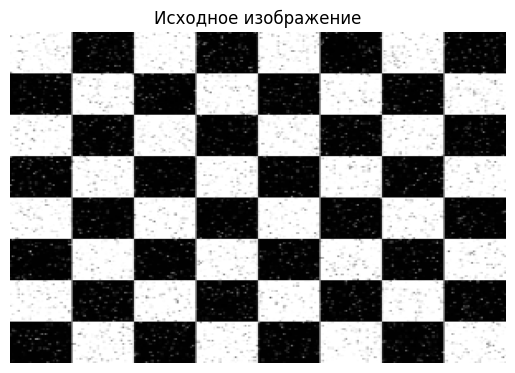

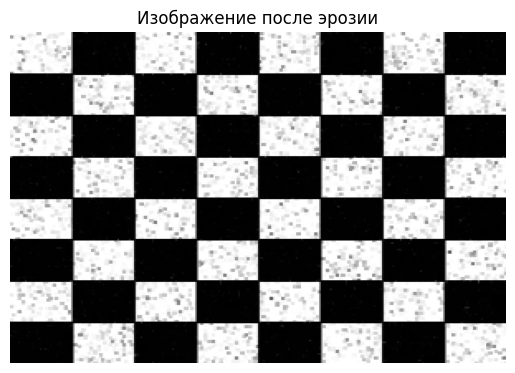

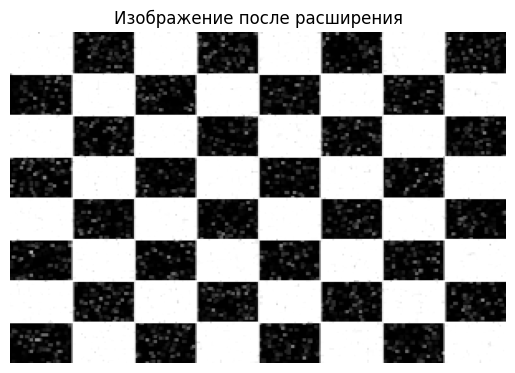

Изображение успешно сохранено как new_chess.jpeg


In [23]:
image_path = 'chess.jpeg'
image = cv2.imread(image_path, 0)

# Проверка, удалось ли загрузить изображение
if image is None:
    print(f"Ошибка: не удалось загрузить изображение по пути {image_path}")
else:
    print("Изображение успешно загружено.")

    # Изменение размера изображения
    resized_image = cv2.resize(image, (300, 200))

    # Отображение исходного изображения
    plt.imshow(resized_image, cmap='gray')
    plt.title('Исходное изображение')
    plt.axis('off')  # Отключение осей координат
    plt.show()

    # Задаем значение ядра
    kernel = np.full((2, 2), 1, np.uint8)

    # Выполняем эрозию
    image_erosion = cv2.erode(resized_image, kernel)

    # Отображение изображения после эрозии
    plt.imshow(image_erosion, cmap='gray')
    plt.title('Изображение после эрозии')
    plt.axis('off')
    plt.show()

    # Выполняем расширение
    image_dilation = cv2.dilate(resized_image, kernel)

    # Отображение изображения после расширения
    plt.imshow(image_dilation, cmap='gray')
    plt.title('Изображение после расширения')
    plt.axis('off')
    plt.show()

    # Сохранение полученного изображения
    output_path = 'new_chess.jpeg'
    cv2.imwrite(output_path, image_dilation)
    print(f"Изображение успешно сохранено как {output_path}")

**Задание 2**

На изображении шахматной доски, полученном в результате выполнения предыдущего задания, выполните операцию обнаружения линий. Отрисуйте обнаруженные линии на изображении красным цветом.

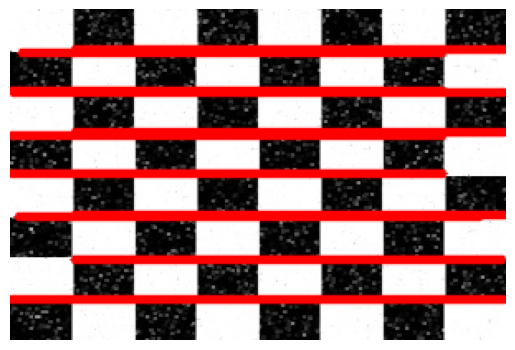

In [37]:
image = cv2.imread('new_chess.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 150)

# Минимальная длина линии
minLineLength = 40
# Максимальный зазор между двумя линиями, чтобы считать их одной линией
maxLineGap = 250

# Поиск линий с помощью преобразования Хафа (в версии Probabilistic Hough Transform)
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=minLineLength, maxLineGap=maxLineGap)

lin_horiz = []
lin_vert = []

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x1 == x2:  
            lin_vert.append(line[0])
        elif y1 == y2:  
            lin_horiz.append(line[0])

    for line in lin_horiz:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 0, 255), 3, cv2.LINE_AA)
    for line in lin_vert:
        cv2.line(image, (line[0], line[1]), (line[2], line[3]), (0, 0, 255), 3, cv2.LINE_AA)

    # Показать изображение с обнаруженными линиями
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Линии не были обнаружены.")

**Задание 3**

Доработать алгоритм таким образом, чтобы вместо окружностей на изображении отрисовывались прямоугольники.

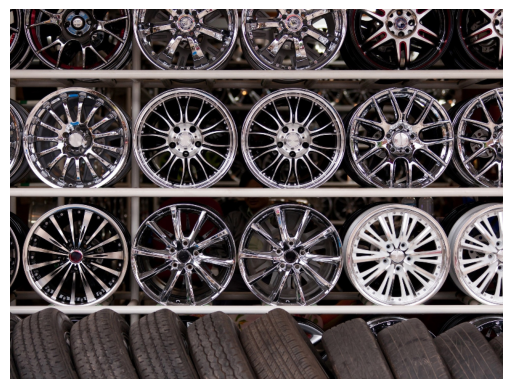

In [40]:
img = cv2.imread('depositphotos.jpeg', cv2.IMREAD_COLOR)

img = cv2.resize(img, (800, 600))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis
plt.show()

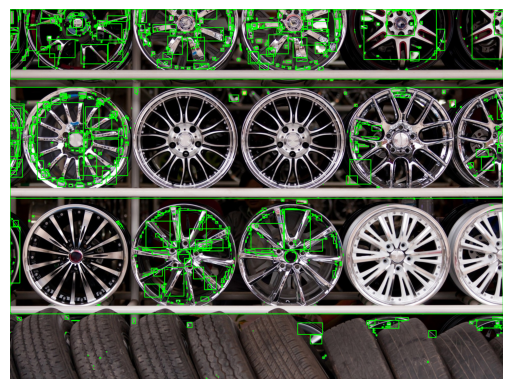

In [43]:
img = cv2.imread('depositphotos.jpeg', cv2.IMREAD_COLOR)

# Конвертация изображения в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Бинаризация изображения
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Поиск контуров
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование прямоугольников вокруг контуров
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Вывод изображения с прямоугольниками
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Задание 4**

Используя пороговую функцию cv2.threshold() на изображении deer.jpeg, преобразуйте изображение в бинарную маску, в которой силуэт животного будет белым на черном фоне. При необходимости можно воспользоваться функциями эрозии и расширения.

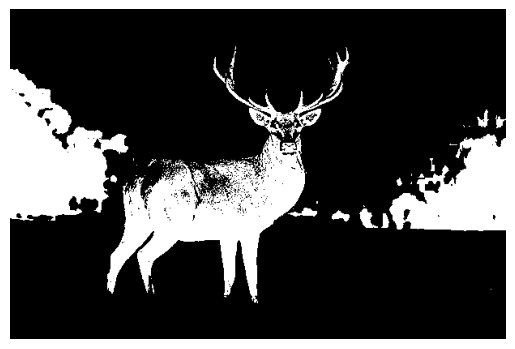

In [46]:
image = cv2.imread('deer.jpeg', cv2.IMREAD_GRAYSCALE)

# Применение пороговой функции
_, binary_mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Отображение бинарной маски
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.show()

**Задание 5**

Выполните распознавание окружностей как можно большего количества мыльных пузырей при помощи библиотеки cv2 и отрисуйте их на изображении.

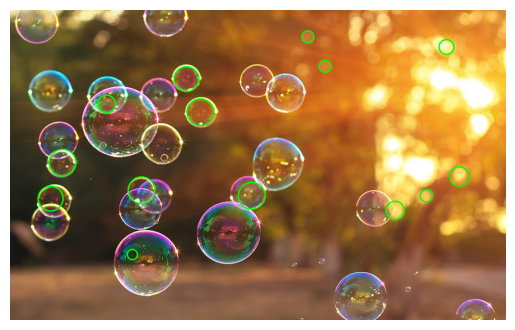

In [54]:
image = cv2.imread('Bubbles.jpeg', cv2.IMREAD_COLOR)

# Преобразование в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия для сглаживания изображения и удаления шума
gray_blurred = cv2.medianBlur(gray, 5)

# Распознавание окружностей методом Хафа
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=1, maxRadius=30)

# Проверка, были ли найдены окружности
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    # Отрисовка окружностей
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        # Отрисовка окружности
        cv2.circle(image, center, radius, (0, 255, 0), 2)

# Отображение изображения с обнаруженными окружностями
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()